# Exploring NLP with random forest algorithm 


$\text{Helping Computers analyze text easily i.e detect spam emails, autocorrect}$

$\text{NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language}$

$\text{Examples of NLP in real life}$


- information retrival 
- Information extraction (Gmails structures events from emails)
- Machine translation (e.g language )
- Text simplification 
- Sentiment analysis 
- Spam filter 
- Auto-predict
- Auto correct 
- Speech recognition 
- Question answering 
- NL generaton 


In [4]:
#Installing natural language processing tool kit 
!pip install nltk

In [28]:
import nltk
#nltk.download()

# Reading and exploring our dataset 

In [27]:
import pandas as pd 


In [42]:
!wget https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv
#!wget https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/blob/master/spam.csv 

--2019-03-15 09:38:20--  https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv
Resolving webproxy (webproxy)... 10.36.24.1
Connecting to webproxy (webproxy)|10.36.24.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  2.41MB/s    in 0.2s    

2019-03-15 09:38:21 (2.41 MB/s) - ‘spam.csv’ saved [503663/503663]



In [77]:
data = pd.read_csv('spam.csv',engine = 'python')

In [85]:
header = ['Labels', 'text']
data= data.rename(columns = {"v1":"Labels", "v2": "Text"})

In [86]:
data.head()

,Labels,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Pre-processing our data 

In [88]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [117]:
#removing punctuations
def remove_punct(text):
    text_nopunct = "".join ([char for char in text if char not in string.punctuation])
    return text_nopunct



In [114]:
data['Clean_text'] = data['Text'].apply(lambda x:remove_punct(x))

In [120]:
data.head()

,Labels,Text,Clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [122]:
#tockenizing the data 
import re
def tokenize(text):
    tockens = re.split('\W+',text)
    return tockens

data['tocknized']=data['Clean_text'].apply(lambda x: tokenize(x.lower()))


In [130]:
# remove stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [131]:
stopword = nltk.corpus.stopwords.words('english')

In [132]:
def rm_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text
data['text_nonstop'] = data['tocknized'].apply(lambda x: rm_stopwords(x))

In [133]:
data.head()

,Labels,Text,Clean_text,tocknized,text_nonstop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [137]:
#Stemming 
ps = nltk.PorterStemmer()


def stemming(tockenized_text):
    text = [ps.stem(word) for word in tockenized_text]
    return text 
data['text_stem'] = data['text_nonstop'].apply(lambda x: stemming(x))
data.head()

,Labels,Text,Clean_text,tocknized,text_nonstop,text_stem
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [141]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemm(tockenized_text):
    text = [wn.lemmatize(word) for word in tockenized_text]
    return text

data['text_lemm'] = data ['text_stem'].apply(lambda x: lemm(x))
data.head()

[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Labels,Text,Clean_text,tocknized,text_nonstop,text_stem,text_lemm
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, goe, usf, live, around, tho..."


In [143]:
#Finally we are vectorizing 
"""Vectorizing is the process of encoding text as integers in order to create feauture vectors so that ML algorithm """

'Vectorizing is the process of encoding text as integers in order to create feauture vectors so that ML algorithm '

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(2,2))
x_counts = count_vect.fit_transform (data ['Text'])
print (x_counts.shape)
print (count_vect.get_feature_names)

(5572, 41481)
<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>


In [159]:
#reduce the number of commont words (this it, then, is)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
x_tfidf = tfidf_vec.fit_transform(data['Text'])
x_tfidf.shape

(5572, 8625)

# Feature engeneering 


In [161]:
"""Feature engineering is the process of using domain knowledge of
the data to create features that make machine learning algorithms work.
In our case we will first look at simple features between spam and ham, 
like message length and punctuations"""

'Feature engineering is the process of using domain knowledge of\nthe data to create features that make machine learning algorithms work.\nIn our case we will first look at simple features between spam and ham, \nlike message length and punctuations'

In [167]:
#calculate length of text 
data['body_len'] = data['Text'].apply(lambda x: len(x)-x.count(" "))
data.head()

,Labels,Text,Clean_text,tocknized,text_nonstop,text_stem,text_lemm,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre...",92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]",24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",39
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, goe, usf, live, around, tho...",49


In [169]:
#count punctuations 
def count_punc(text):
    count = sum ([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")), 3)*100

data['punch%'] = data['Text'].apply(lambda x: count_punc(x))
data.head()

,Labels,Text,Clean_text,tocknized,text_nonstop,text_stem,text_lemm,body_len,punch%
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre...",92,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]",24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, goe, usf, live, around, tho...",49,4.1


In [187]:
#Plot histogram and compare the two
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0,200,40)

In [190]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


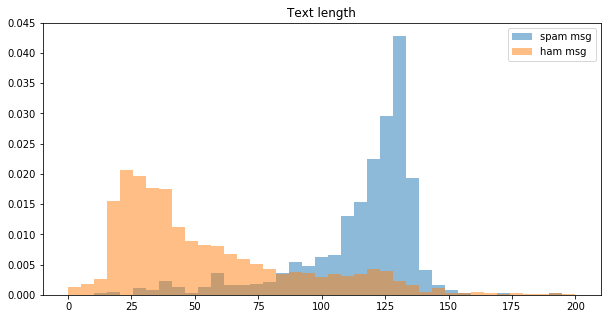

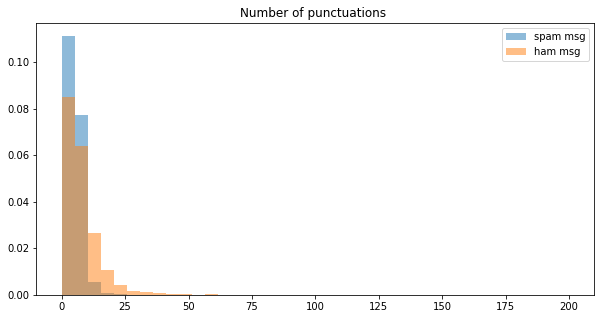

In [198]:
plt.figure(figsize=(10,5))
plt.hist(data[data['Labels']=='spam']['body_len'],bins,alpha = 0.5, normed= True, label='spam msg')
plt.hist(data[data['Labels']=='ham']['body_len'],bins,alpha = 0.5, normed= True, label='ham msg')
plt.legend(loc='upper right')
plt.title('Text length')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(data[data['Labels']=='spam']['punch%'],bins,alpha = 0.5, normed= True, label='spam msg')
plt.hist(data[data['Labels']=='ham']['punch%'],bins,alpha = 0.5, normed= True, label='ham msg')
plt.legend(loc='upper right')
plt.title('Number of punctuations ')
plt.show()